# Task 2 - Exploratory Data Analysis (EDA)

This notebook explores the raw transactions dataset to:
- Understand structure, distributions, and data types.
- Identify missing values and outliers.
- Analyze correlations among numeric features.
- Summarize top insights to guide feature engineering.

## 1. Setup and Imports

In [1]:
import sys
from pathlib import Path

# Add src to path so we can import our modules
PROJECT_ROOT = Path.cwd().parent
sys.path.insert(0, str(PROJECT_ROOT / "src"))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from data_processing import get_raw_data_path, load_raw_data, run_eda

# Plot settings
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

## 2. Load Data

In [2]:
data_path = get_raw_data_path()
print(f"Loading data from: {data_path}")

df = load_raw_data(data_path)
df.head()

Loading data from: /Users/macbookpro/Documents/Credit-Risk-Probability-Model/data/raw/data.csv


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


## 3. Overview of the Data

Understand the structure: number of rows, columns, and data types.

In [3]:
# Run EDA helper
eda = run_eda(df)

overview = eda["overview"]
print(f"Number of rows: {overview['n_rows']}")
print(f"Number of columns: {overview['n_cols']}")
print(f"\nColumns: {overview['columns']}")
print(f"\nData types:")
for col, dtype in overview["dtypes"].items():
    print(f"  {col}: {dtype}")

Number of rows: 95662
Number of columns: 16

Columns: ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'Amount', 'Value', 'TransactionStartTime', 'PricingStrategy', 'FraudResult']

Data types:
  TransactionId: object
  BatchId: object
  AccountId: object
  SubscriptionId: object
  CustomerId: object
  CurrencyCode: object
  CountryCode: int64
  ProviderId: object
  ProductId: object
  ProductCategory: object
  ChannelId: object
  Amount: float64
  Value: int64
  TransactionStartTime: object
  PricingStrategy: int64
  FraudResult: int64


**Observation**:
- The dataset contains **95,662 rows** and **16 columns**.
- `TransactionStartTime` is currently an `object` (string) and must be converted to `datetime`.
- `FraudResult` and `PricingStrategy` are integers but act as categorical/flags.

## 4. Summary Statistics

### 4.1 Numeric Features

In [4]:
eda["summary_numeric"]

,count,mean,std,min,25%,50%,75%,max
CountryCode,95662.0,256.000000,0.000000,256.0,256.0,256.0,256.0,256.0
Amount,95662.0,6717.846433,123306.797164,-1000000.0,-50.0,1000.0,2800.0,9880000.0
Value,95662.0,9900.583941,123122.087776,2.0,275.0,1000.0,5000.0,9880000.0
PricingStrategy,95662.0,2.255974,0.732924,0.0,2.0,2.0,2.0,4.0
FraudResult,95662.0,0.002018,0.044872,0.0,0.0,0.0,0.0,1.0


### 4.2 Categorical Features (Top 10 per column)

In [5]:
for col, counts in eda["summary_categorical"].items():
    print(f"\n--- {col} ---")
    print(counts)


--- TransactionId ---
TransactionId
TransactionId_76871     1
TransactionId_74922     1
TransactionId_2737      1
TransactionId_28101     1
TransactionId_33267     1
TransactionId_135291    1
TransactionId_87468     1
TransactionId_134872    1
TransactionId_113925    1
TransactionId_16554     1
Name: count, dtype: int64

--- BatchId ---
BatchId
BatchId_67019     28
BatchId_51870     16
BatchId_113893    14
BatchId_127204    12
BatchId_116835    10
BatchId_88001      9
BatchId_49408      7
BatchId_110084     7
BatchId_86880      6
BatchId_107049     6
Name: count, dtype: int64

--- AccountId ---
AccountId
AccountId_4841    30893
AccountId_4249     4457
AccountId_4840     1738
AccountId_3206     1105
AccountId_318      1070
AccountId_10        965
AccountId_3595      465
AccountId_751       411
AccountId_2648      359
AccountId_2314      356
Name: count, dtype: int64

--- SubscriptionId ---
SubscriptionId
SubscriptionId_3829    32630
SubscriptionId_4429     4457
SubscriptionId_1372     

**Observation**:
- **Constants**: `CurrencyCode` and `CountryCode` have only one unique value and should be dropped.
- **High Cardinality**: `AccountId` and `SubscriptionId` have many unique values, but a few IDs dominate (e.g., `AccountId_4841` has ~30k transactions), suggesting repeat usage by agents or power users.
- **Dominant Categories**: `financial_services` and `airtime` make up the vast majority of `ProductCategory`.

## 5. Distribution of Numerical Features

Visualize distributions to identify patterns, skewness, and potential outliers.

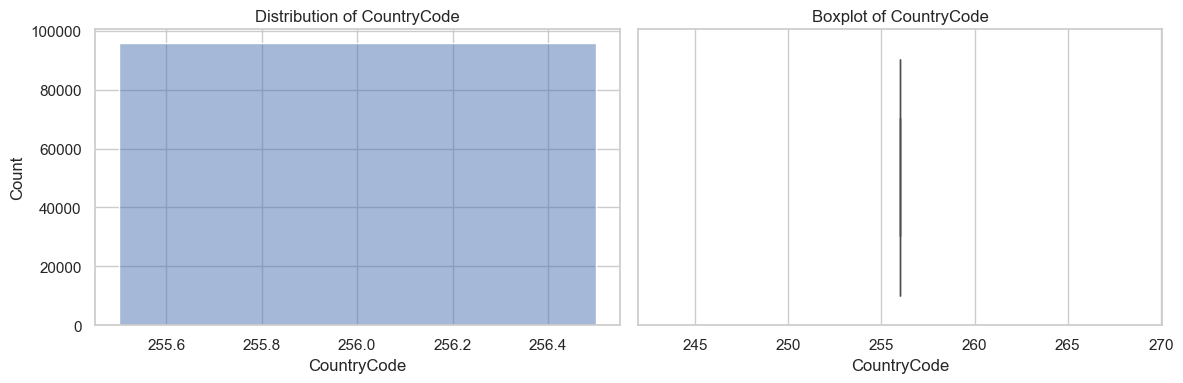

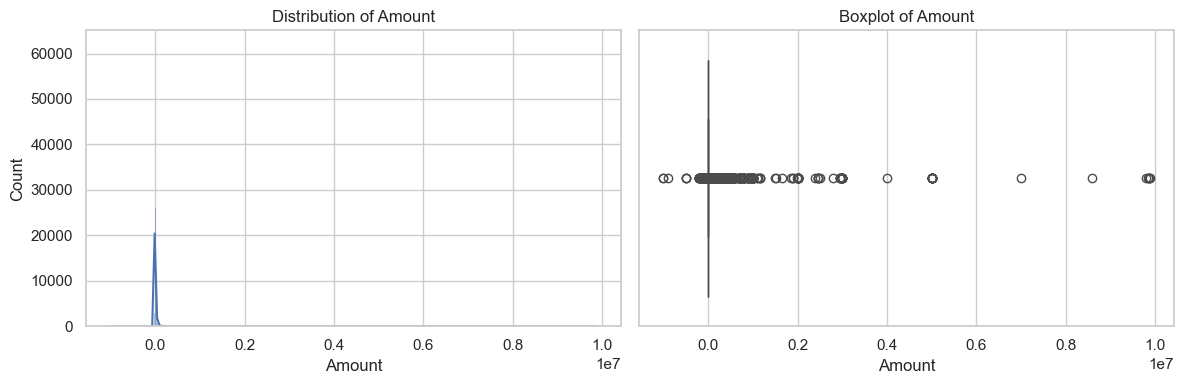

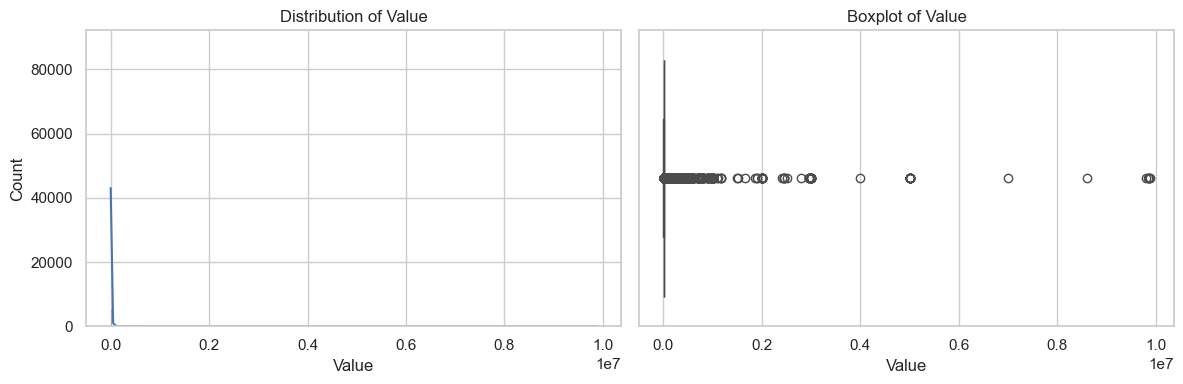

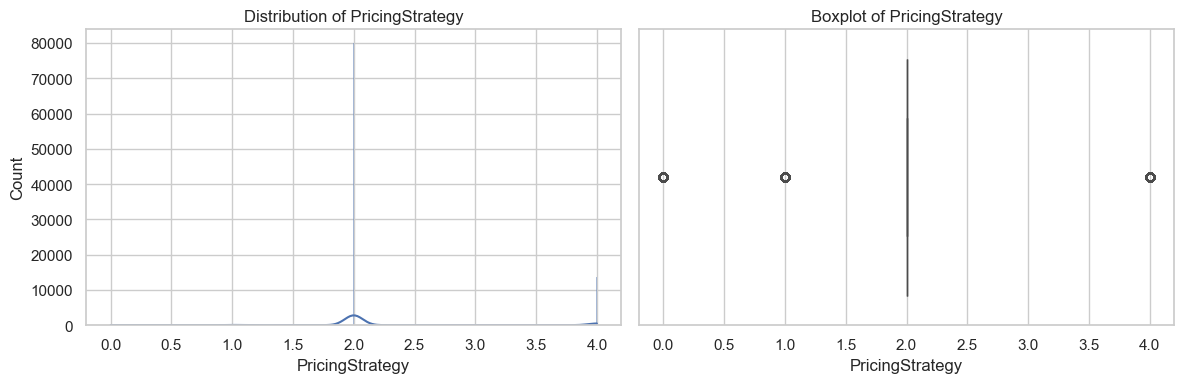

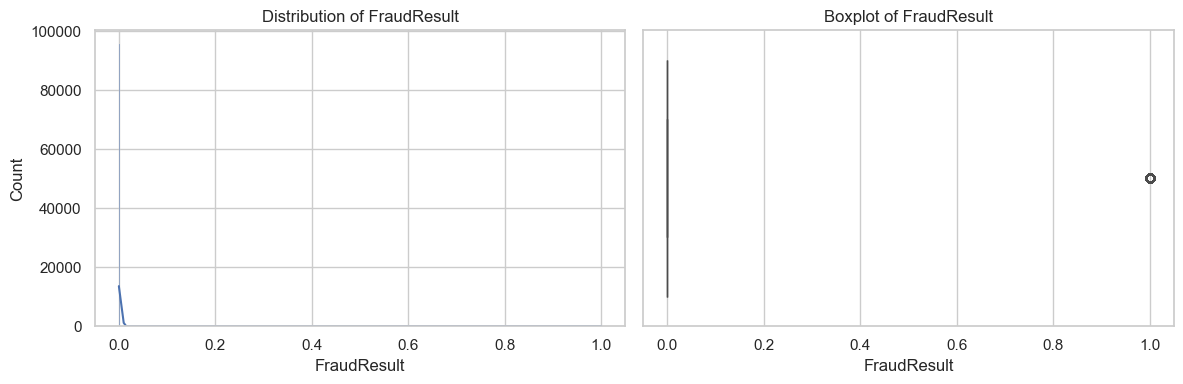

In [6]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

for col in numeric_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Histogram
    sns.histplot(df[col], kde=True, ax=axes[0])
    axes[0].set_title(f"Distribution of {col}")
    
    # Boxplot
    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f"Boxplot of {col}")
    
    plt.tight_layout()
    plt.show()

**Observation**:
- **Skewness**: `Amount` and `Value` are extremely right-skewed (long tail). Most transactions are small, with a few massive ones.
- **Implication**: Standard scaling (Z-score) will be distorted by these extreme values. We should use `RobustScaler` or log-transform these features.

## 6. Distribution of Categorical Features

Analyze frequency and variability of categories.

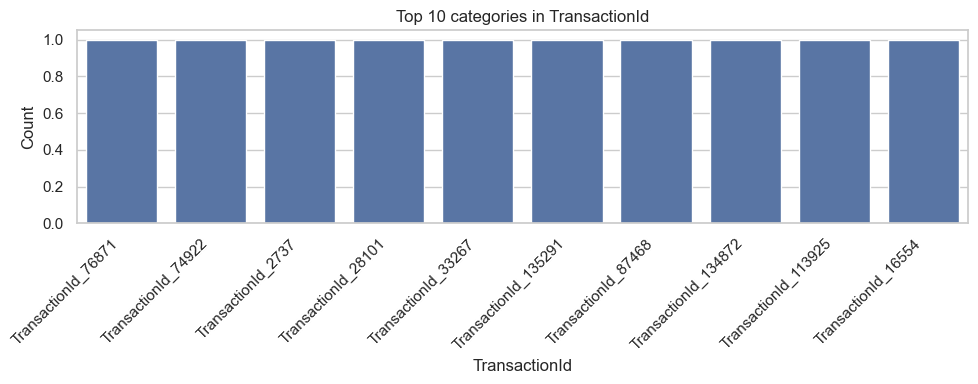

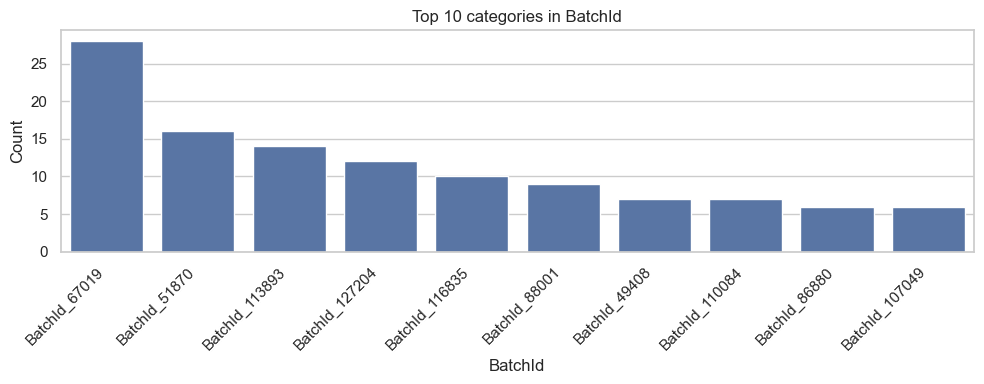

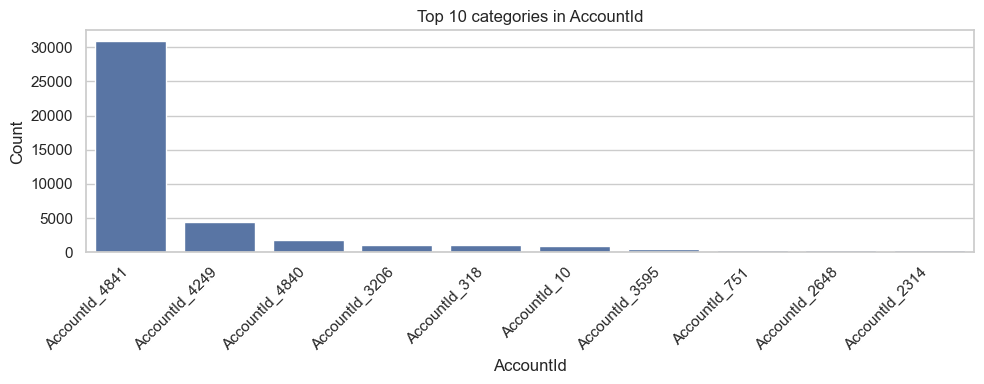

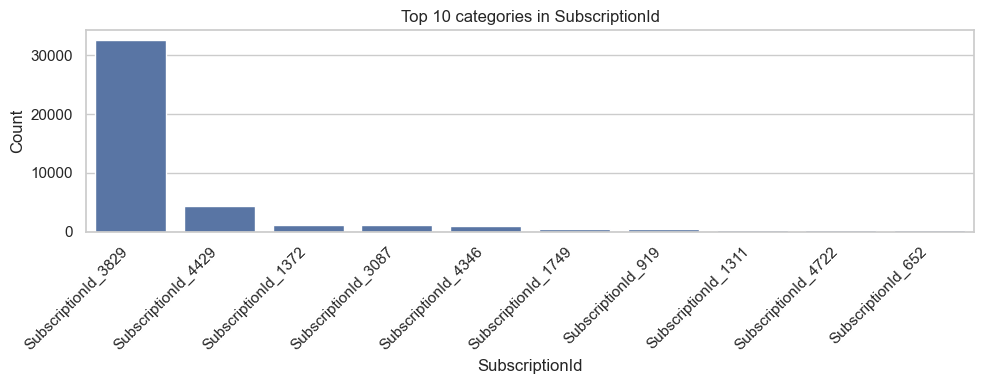

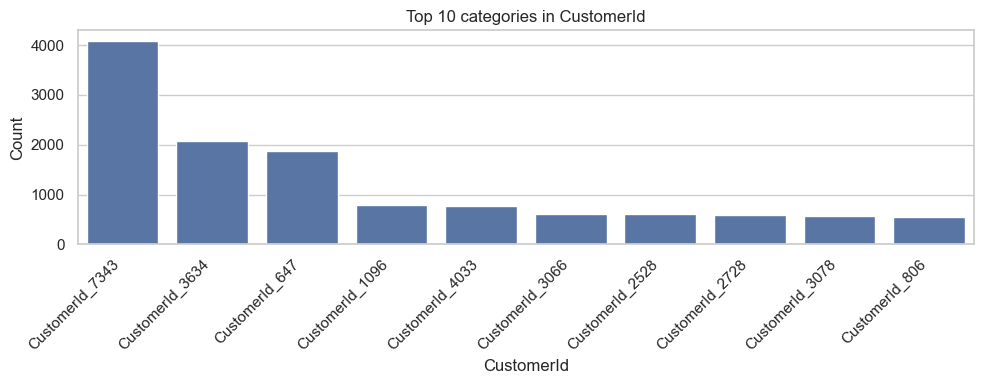

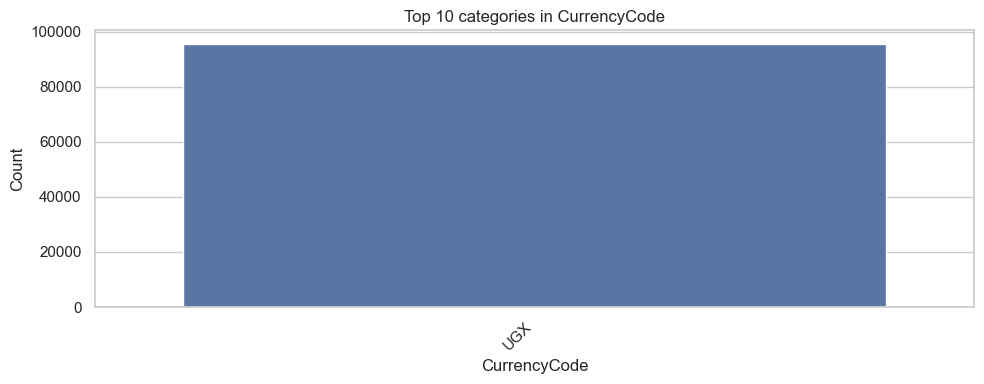

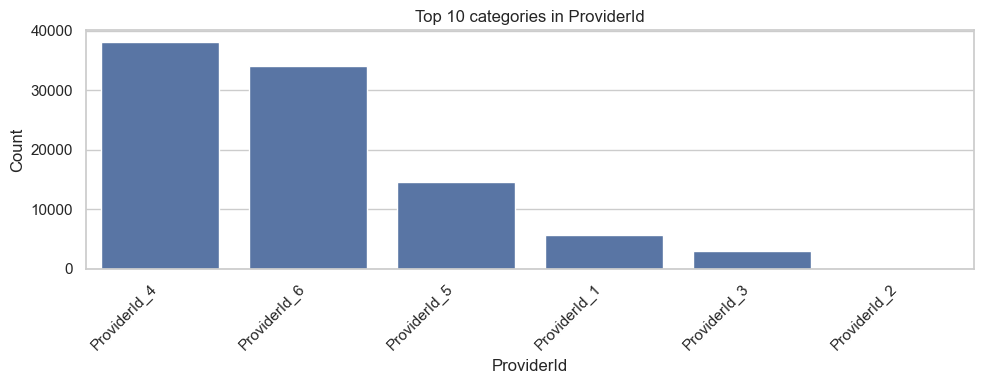

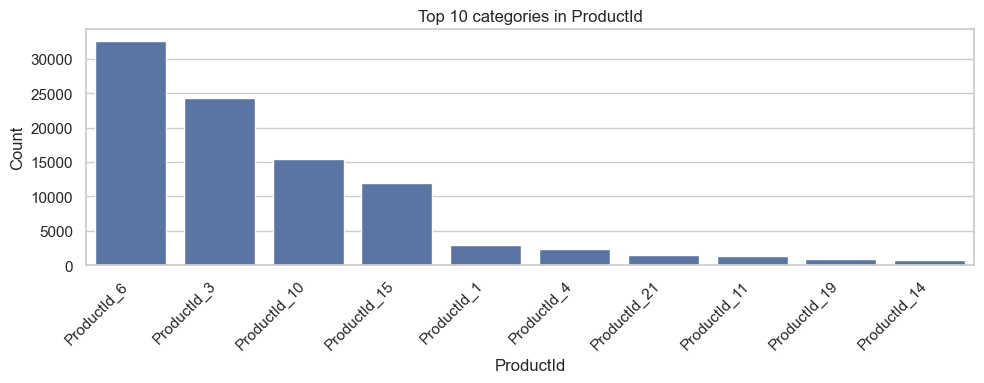

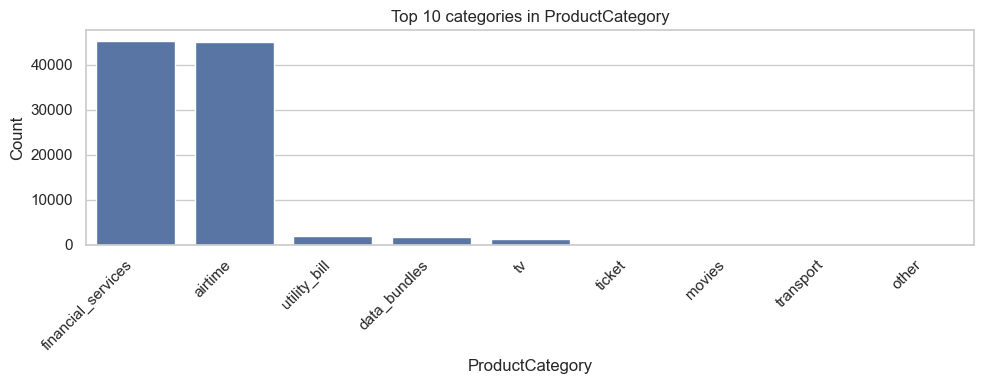

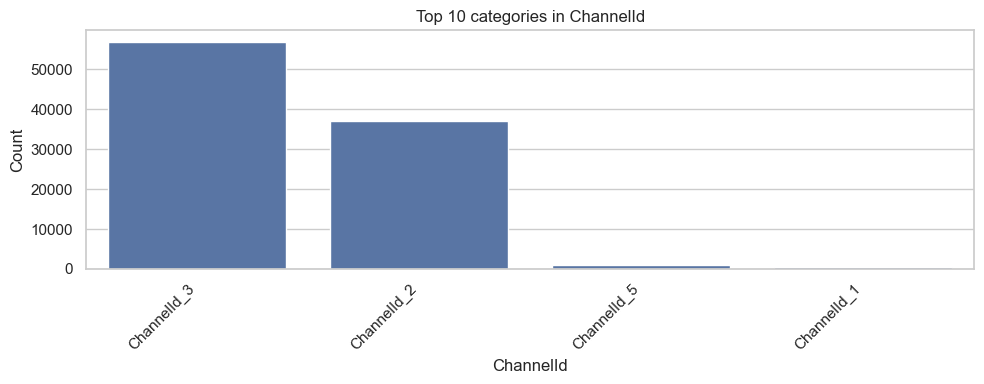

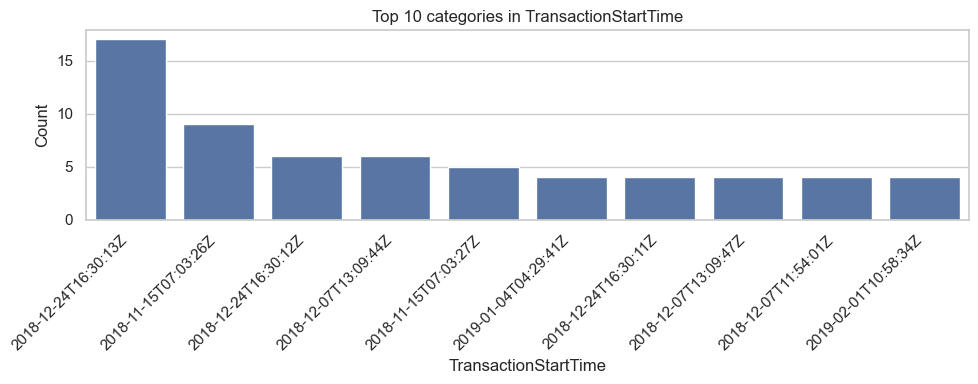

In [7]:
categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    top_values = df[col].value_counts().head(10)
    sns.barplot(x=top_values.index, y=top_values.values)
    plt.title(f"Top 10 categories in {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

**Observation**:
- **Product Categories**: The top 2 categories (`financial_services`, `airtime`) account for ~95% of volume. Categories like `transport`, `other` are negligible and can be grouped.
- **Provider Dominance**: `ProviderId_4` is the largest provider. Provider-specific risk might be a useful feature.

## 7. Correlation Analysis

Understand relationships between numerical features.

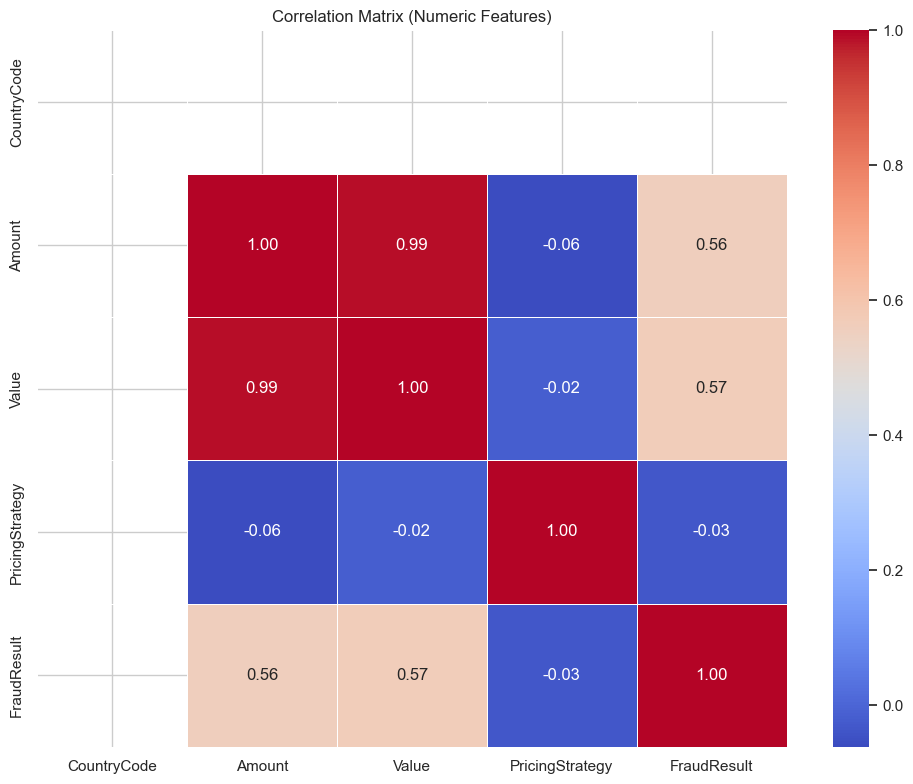

In [8]:
corr_matrix = eda["corr_numeric"]

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (Numeric Features)")
plt.tight_layout()
plt.show()

**Observation**:
- **Perfect Correlation**: `Value` and `Amount` are redundant (correlation 1.0 or -1.0). We should drop one (likely `Value` if `Amount` contains sign info).
- **Independence**: `FraudResult` has near-zero correlation with other numerical features, implying linear models might struggle to detect fraud without feature engineering.

## 8. Identifying Missing Values

Identify columns with missing data to decide on imputation strategies.

In [9]:
missing_table = eda["missing_table"]
missing_table

,column,n_missing,pct_missing
0,TransactionId,0,0.0
1,BatchId,0,0.0
2,AccountId,0,0.0
3,SubscriptionId,0,0.0
4,CustomerId,0,0.0
5,CurrencyCode,0,0.0
6,CountryCode,0,0.0
7,ProviderId,0,0.0
8,ProductId,0,0.0
9,ProductCategory,0,0.0


In [10]:
# Visualize missing values
missing_with_values = missing_table[missing_table["n_missing"] > 0]

if len(missing_with_values) > 0:
    plt.figure(figsize=(10, 4))
    sns.barplot(x="column", y="pct_missing", data=missing_with_values)
    plt.title("Percentage of Missing Values by Column")
    plt.xlabel("Column")
    plt.ylabel("% Missing")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found in the dataset.")

No missing values found in the dataset.


## 9. Outlier Detection

Use IQR method to identify outliers in numeric columns.

In [11]:
outlier_info = eda["outlier_info"]
outlier_info

,column,Q1,Q3,IQR,lower_bound,upper_bound,n_outliers,pct_outliers
0,CountryCode,256.0,256.0,0.0,256.0,256.0,0,0.000000
1,Amount,-50.0,2800.0,2850.0,-4325.0,7075.0,24441,25.549330
2,Value,275.0,5000.0,4725.0,-6812.5,12087.5,9021,9.430077
3,PricingStrategy,2.0,2.0,0.0,2.0,2.0,15814,16.531120
4,FraudResult,0.0,0.0,0.0,0.0,0.0,193,0.201752


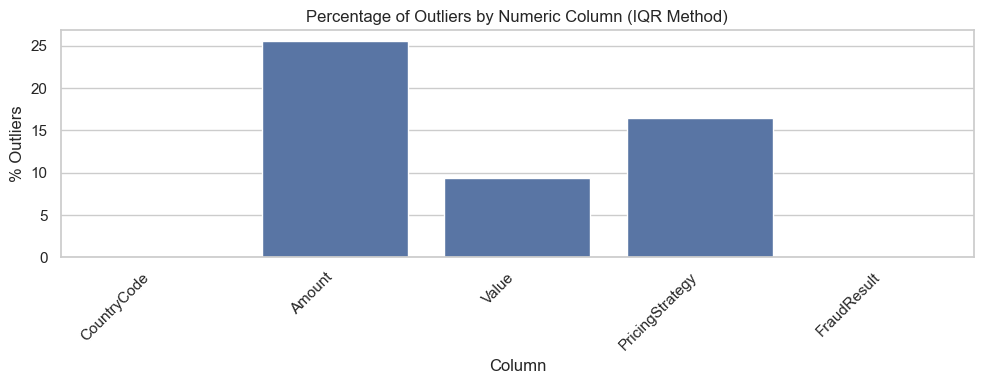

In [12]:
# Visualize outlier percentages
plt.figure(figsize=(10, 4))
sns.barplot(x="column", y="pct_outliers", data=outlier_info)
plt.title("Percentage of Outliers by Numeric Column (IQR Method)")
plt.xlabel("Column")
plt.ylabel("% Outliers")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

**Observation**:
- **High Outlier Count**: ~25% of `Amount` values are flagged as outliers by IQR. This confirms the distribution is heavy-tailed.
- **Strategy**: We should *not* remove these outliers as they likely represent high-value valid transactions. Instead, we will handle them via **scaling** (RobustScaler) or **transformation** (Log) in the feature engineering phase.

## 10. Top 3-5 Insights

Based on the EDA above, here are the most important findings:

1. **Clean Dataset**: The data has **0 missing values** across all columns, so no imputation is needed for the raw fields.

2. **High Skewness & Outliers**: 
   - `Amount` and `Value` are highly right-skewed with extreme outliers (up to 9.8M).
   - About **25% of transactions** are flagged as outliers in `Amount` by the IQR method. 
   - **Action**: We will need robust scaling (e.g., Log or RobustScaler) and potentially binning for these features.

3. **Constant & Dominant Features**:
   - `CurrencyCode` (UGX) and `CountryCode` (256) have only **1 unique value** each. They provide no information and should be **dropped**.
   - `PricingStrategy` is almost exclusively category '2' (75%+), making others statistical outliers.

4. **Class Imbalance**:
   - `FraudResult` is extremely imbalanced (~0.2% positive cases).
   - **Action**: While we are building a credit risk proxy, we should be aware that "bad" behavior might be rare if we were predicting fraud. For credit risk (RFM), we will create our own balanced target.

5. **Categorical Concentration**:
   - `ProductCategory` is dominated by `financial_services` and `airtime` (~95% of data).
   - `ProviderId` is dominated by `ProviderId_4` and `ProviderId_6`.
   - **Action**: We should group rare categories into "Other" to reduce dimensionality during one-hot encoding.